# Grocery Stores in DC
The purpose of this week's assignment is to explore the location of grocery stores in DC and connect that accessibility of grocery stores to residents. Ideally, this would then be tied to vehicle ownership data that was captured last week.

In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import contextily as ctx

Importing the data as a geojson

In [4]:
df=pd.read_csv('data/Grocery_Store_Locations.csv')

Open up columns and rows to see all information displayed

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X                 82 non-null     float64
 1   Y                 82 non-null     float64
 2   STORENAME         82 non-null     object 
 3   ADDRESS           82 non-null     object 
 4   ZIPCODE           82 non-null     int64  
 5   PHONE             82 non-null     int64  
 6   WARD              82 non-null     object 
 7   SSL               82 non-null     object 
 8   NOTES             53 non-null     object 
 9   PRESENT90         55 non-null     object 
 10  PRESENT95         55 non-null     object 
 11  PRESENT00         55 non-null     object 
 12  PRESENT05         55 non-null     object 
 13  PRESENT08         55 non-null     object 
 14  PRESENT09         55 non-null     object 
 15  PRESENT10         55 non-null     object 
 16  PRESENT11         55 non-null     object 
 17 

In [7]:
df.head()

X          Y                       STORENAME  \
0 -77.026981  38.984455                         Target    
1 -77.026066  38.983464  International Progresso Market   
2 -77.027798  38.967771               Jocelyn’s Market    
3 -77.076459  38.965553                      Magruder's   
4 -77.074910  38.964601                         Safeway   

                      ADDRESS  ZIPCODE       PHONE    WARD           SSL  \
0      7828 GEORGIA AVENUE NW    20012  2028923822  Ward 4  2960    0017   
1      7719 GEORGIA AVENUE NW    20012  2025455015  Ward 4  2961    0810   
2      6404 GEORGIA AVENUE NW    20012  2027227574  Ward 4  2945    0839   
3  5626 CONNECTICUT AVENUE NW    20015  2024644946  Ward 3  1860    0013   
4  5545 CONNECTICUT AVENUE NW    20015  2022446097  Ward 3  1867    0092   

  NOTES PRESENT90 PRESENT95 PRESENT00 PRESENT05 PRESENT08 PRESENT09 PRESENT10  \
0   NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1   NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2   NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3             Yes       Yes       Yes       Yes       Yes       Yes       Yes   
4              No       Yes       Yes       Yes       Yes       Yes       Yes   

  PRESENT11 PRESENT12 PRESENT13 PRESENT14 PRESENT15 PRESENT16 PRESENT17  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3       Yes       Yes       Yes       Yes       Yes       Yes       Yes   
4       Yes       Yes       Yes       Yes       Yes       Yes       Yes   

  PRESENT18            GIS_ID  OBJECTID     XCOORD     YCOORD  MAR_ID  \
0       NaN  GroceryStorePt_1       641  397662.57  146280.07  300512   
1       NaN  GroceryStorePt_2       642  397741.80  146169.97  285417   
2       NaN  GroceryStorePt_3       643  397591.16  144428.00  285334   
3       Yes  GroceryStorePt_4       644  393373.92  144184.19  263860   
4       Yes  GroceryStorePt_5       645  393508.13  144078.34  263999   

   SE_ANNO_CAD_DATA                                GLOBALID CREATOR  \
0               NaN  {CE302122-4E8D-4DC7-845B-06563B993F66}    JLAY   
1               NaN  {2C18863D-40DE-4F66-AA59-46F1C65D67F2}    JLAY   
2               NaN  {A0B448C3-B3FB-49FE-B8BF-1FEBA3CEA642}    JLAY   
3               NaN  {9ABE1C46-BB48-4110-B5BA-C6363CA3BD7A}    JLAY   
4               NaN  {902F540E-FE16-43A5-8010-CD84E94B28B7}    JLAY   

                  CREATED EDITOR                  EDITED PRESENT22  
0  2022/09/28 18:04:54+00   JLAY  2022/09/28 18:04:54+00       Yes  
1  2022/09/28 18:04:54+00   JLAY  2022/09/28 18:04:54+00       Yes  
2  2022/09/28 18:04:54+00   JLAY  2022/09/28 18:04:54+00       Yes  
3  2022/09/28 18:04:54+00   JLAY  2022/09/28 18:04:54+00       Yes  
4  2022/09/28 18:04:54+00   JLAY  2022/09/28 18:04:54+00       Yes

Converting data into a geodata frame using the X and Y coordinates for longitude and latitude. I'm not sure what coordinate system is being used here, so I will try to determine that, as well.

In [8]:
gdf = gpd.GeoDataFrame(df, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df.X, df.Y))

In [9]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Plotting the location of grocery stores

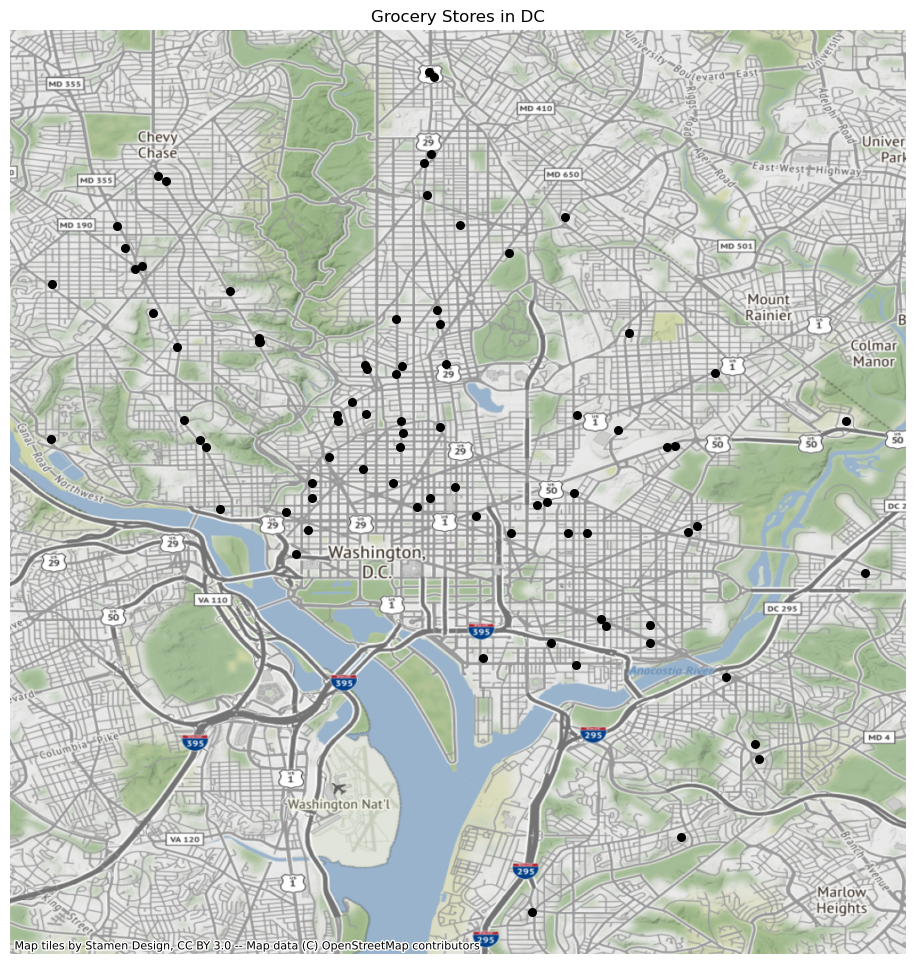

In [10]:
fig, ax = plt.subplots(figsize=(12,12))

gdf.plot(ax=ax, 
        marker='o',
        markersize=30,
        color='black')

ax.axis('off')

ax.set_title('Grocery Stores in DC')

ctx.add_basemap(ax, crs=4326)

Now I want to distinguish grocery stores by ward (distinict geopolitical areas in DC), which is already a column in the original dataset.

In [11]:
import plotly.express as px

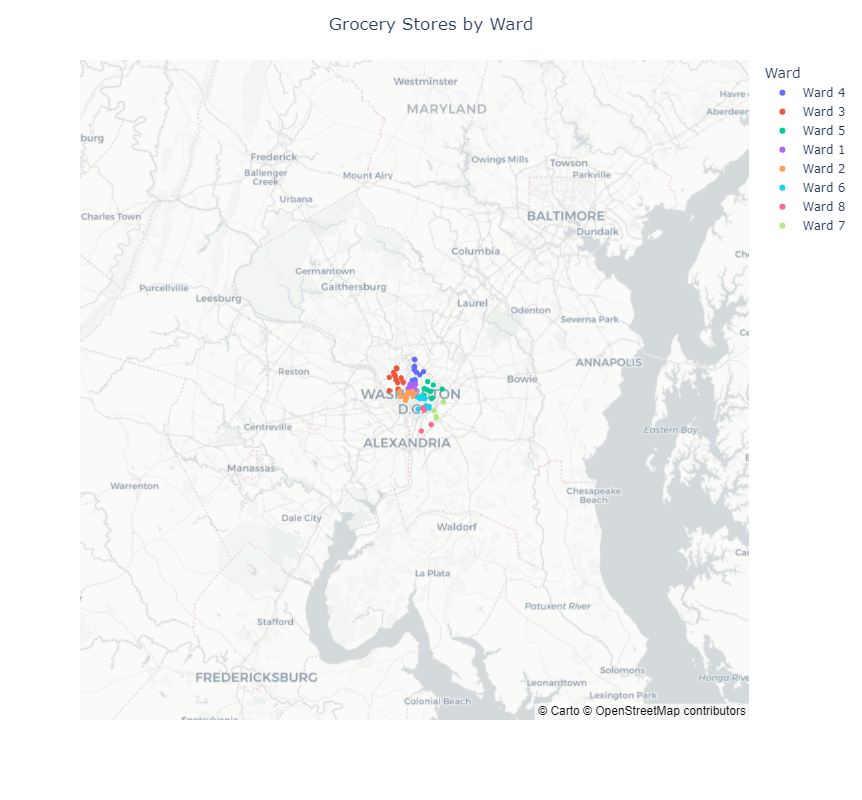

In [12]:
fig = px.scatter_mapbox(gdf, 
                        lat="Y", 
                        lon="X", 
                        color="WARD",
                        labels={'WARD':'Ward'},
                        mapbox_style="carto-positron"
                       )

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "Grocery Stores by Ward",
    title_x=0.5 # aligns title to center
)


fig.show()

Now I want to plot some of the data and show the number of grocery stores 
by ward.

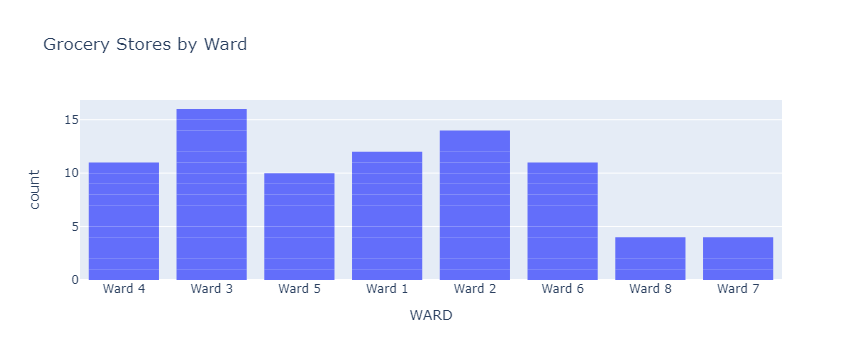

In [13]:
fig = px.bar(df,
       x='WARD',
       title='Grocery Stores by Ward'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

# Measuring Distance to Grocery Stores using Census Blocks

First, I will import Census Blocks.

In [14]:
blocks = gpd.read_file('data/Census_Blocks_in_2020.geojson')

In [15]:
blocks.head()

OBJECTID  BLKGRP BLOCK                     GEOID  P0010001  P0010002  \
0         1       1  1004  7500000US110010001021004         0         0   
1         2       1  1006  7500000US110010001021006       265       244   
2         3       1  1001  7500000US110010001021001         0         0   
3         4       3  3009  7500000US110010014023009       163       156   
4         5       1  1009  7500000US110010024001009        60        48   

   P0010003  P0010004  P0010005  P0010006  P0010007  P0010008  P0020002  \
0         0         0         0         0         0         0         0   
1       210         6         0        13         0        15        46   
2         0         0         0         0         0         0         0   
3       133        12         0         5         0         6        11   
4        35        10         0         0         0         3         7   

   P0020005  P0020006  P0020007  P0020008  P0020009  P0020010  P0030001  \
0         0         0         0         0         0         0         0   
1       195         6         0        13         0         0       240   
2         0         0         0         0         0         0         0   
3       129        12         0         5         0         0       141   
4        34        10         0         0         0         0        49   

   P0030003  P0030004  P0030005  P0030006  P0030007  P0030008  P0040002  \
0         0         0         0         0         0         0         0   
1       190         6         0        13         0        15        39   
2         0         0         0         0         0         0         0   
3       115        12         0         3         0         6         9   
4        32         8         0         0         0         3         6   

   P0040005  P0040006  P0040007  P0040008  P0040009  P0040010  H0010001  \
0         0         0         0         0         0         0         0   
1       178         6         0        13         0         0       201   
2         0         0         0         0         0         0         0   
3       113        12         0         3         0         0       131   
4        31         8         0         0         0         0        21   

   H0010002  H0010003   TRACT   ALAND  AWATER   SHAPE_LENG STUSAB  SUMLEV  \
0         0         0  000102  125930       0  1857.054502     DC     750   
1       189        12  000102  162560       0  2139.237670     DC     750   
2         0         0  000102  217073       0  2967.214792     DC     750   
3       101        30  001402   16256       0   643.263268     DC     750   
4        12         9  002400    4697       0   388.957952     DC     750   

           GEOCODE  STATE        NAME  POP100  HU100  P0010009  P0010010  \
0  110010001021004     11  Block 1004       0      0         0         0   
1  110010001021006     11  Block 1006     265    201        21        20   
2  110010001021001     11  Block 1001       0      0         0         0   
3  110010014023009     11  Block 3009     163    131         7         7   
4  110010024001009     11  Block 1009      60     21        12        11   

   P0010011  P0010012  P0010013  P0010014  P0010015  P0010016  P0010017  \
0         0         0         0         0         0         0         0   
1         0         0         2         0        17         0         1   
2         0         0         0         0         0         0         0   
3         0         1         0         0         3         3         0   
4         0         0         6         0         0         1         0   

   P0010018  P0010019  P0010020  P0010021  P0010022  P0010023  P0010024  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4 

Note that the geometry block has the longitude and latitude range that we need. I'll also keep Block and GEOID in case that becomes useful later. I'll trim the rest of the data out, for now.

In [16]:
columns_to_keep=['BLOCK','GEOID','geometry']
blocks_trimmed=blocks[columns_to_keep]

In [17]:
blocks_trimmed.head()

BLOCK                     GEOID  \
0  1004  7500000US110010001021004   
1  1006  7500000US110010001021006   
2  1001  7500000US110010001021001   
3  3009  7500000US110010014023009   
4  1009  7500000US110010024001009   

                                            geometry  
0  POLYGON ((-77.06861 38.91704, -77.06875 38.916...  
1  POLYGON ((-77.05981 38.91262, -77.05953 38.912...  
2  POLYGON ((-77.06732 38.91865, -77.06739 38.917...  
3  POLYGON ((-77.07101 38.95735, -77.07111 38.957...  
4  POLYGON ((-77.02141 38.93770, -77.02140 38.937...

<AxesSubplot: >

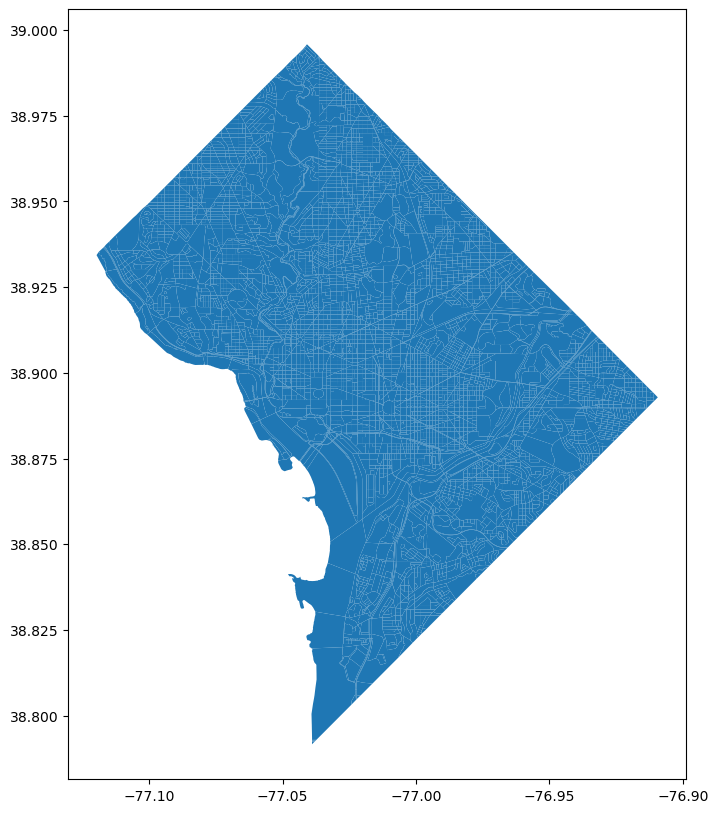

In [18]:
blocks_trimmed.plot(figsize=(12,10))

Now, I want to create a loop that maps distances to grocery stores for each Census Block.

In [19]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   X                 82 non-null     float64 
 1   Y                 82 non-null     float64 
 2   STORENAME         82 non-null     object  
 3   ADDRESS           82 non-null     object  
 4   ZIPCODE           82 non-null     int64   
 5   PHONE             82 non-null     int64   
 6   WARD              82 non-null     object  
 7   SSL               82 non-null     object  
 8   NOTES             53 non-null     object  
 9   PRESENT90         55 non-null     object  
 10  PRESENT95         55 non-null     object  
 11  PRESENT00         55 non-null     object  
 12  PRESENT05         55 non-null     object  
 13  PRESENT08         55 non-null     object  
 14  PRESENT09         55 non-null     object  
 15  PRESENT10         55 non-null     object  
 16  PRESENT11         55

In [20]:
blocks_trimmed.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   BLOCK     6012 non-null   object  
 1   GEOID     6012 non-null   object  
 2   geometry  6012 non-null   geometry
dtypes: geometry(1), object(2)
memory usage: 141.0+ KB


So we can see that we are dealing with floats for the X and Y columns
while the blocks are geometry. Accordingly, we can use the boundary.distance function to calculate distance to each point.

In [21]:
import shapely
from shapely.geometry import Polygon, Point

In [22]:
grocery=pd.read_csv('data/Grocery_Store_Locations.csv')

In [23]:
grocery.head()

X          Y                       STORENAME  \
0 -77.026981  38.984455                         Target    
1 -77.026066  38.983464  International Progresso Market   
2 -77.027798  38.967771               Jocelyn’s Market    
3 -77.076459  38.965553                      Magruder's   
4 -77.074910  38.964601                         Safeway   

                      ADDRESS  ZIPCODE       PHONE    WARD           SSL  \
0      7828 GEORGIA AVENUE NW    20012  2028923822  Ward 4  2960    0017   
1      7719 GEORGIA AVENUE NW    20012  2025455015  Ward 4  2961    0810   
2      6404 GEORGIA AVENUE NW    20012  2027227574  Ward 4  2945    0839   
3  5626 CONNECTICUT AVENUE NW    20015  2024644946  Ward 3  1860    0013   
4  5545 CONNECTICUT AVENUE NW    20015  2022446097  Ward 3  1867    0092   

  NOTES PRESENT90 PRESENT95 PRESENT00 PRESENT05 PRESENT08 PRESENT09 PRESENT10  \
0   NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1   NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2   NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3             Yes       Yes       Yes       Yes       Yes       Yes       Yes   
4              No       Yes       Yes       Yes       Yes       Yes       Yes   

  PRESENT11 PRESENT12 PRESENT13 PRESENT14 PRESENT15 PRESENT16 PRESENT17  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3       Yes       Yes       Yes       Yes       Yes       Yes       Yes   
4       Yes       Yes       Yes       Yes       Yes       Yes       Yes   

  PRESENT18            GIS_ID  OBJECTID     XCOORD     YCOORD  MAR_ID  \
0       NaN  GroceryStorePt_1       641  397662.57  146280.07  300512   
1       NaN  GroceryStorePt_2       642  397741.80  146169.97  285417   
2       NaN  GroceryStorePt_3       643  397591.16  144428.00  285334   
3       Yes  GroceryStorePt_4       644  393373.92  144184.19  263860   
4       Yes  GroceryStorePt_5       645  393508.13  144078.34  263999   

   SE_ANNO_CAD_DATA                                GLOBALID CREATOR  \
0               NaN  {CE302122-4E8D-4DC7-845B-06563B993F66}    JLAY   
1               NaN  {2C18863D-40DE-4F66-AA59-46F1C65D67F2}    JLAY   
2               NaN  {A0B448C3-B3FB-49FE-B8BF-1FEBA3CEA642}    JLAY   
3               NaN  {9ABE1C46-BB48-4110-B5BA-C6363CA3BD7A}    JLAY   
4               NaN  {902F540E-FE16-43A5-8010-CD84E94B28B7}    JLAY   

                  CREATED EDITOR                  EDITED PRESENT22  
0  2022/09/28 18:04:54+00   JLAY  2022/09/28 18:04:54+00       Yes  
1  2022/09/28 18:04:54+00   JLAY  2022/09/28 18:04:54+00       Yes  
2  2022/09/28 18:04:54+00   JLAY  2022/09/28 18:04:54+00       Yes  
3  2022/09/28 18:04:54+00   JLAY  2022/09/28 18:04:54+00       Yes  
4  2022/09/28 18:04:54+00   JLAY  2022/09/28 18:04:54+00       Yes

In [24]:
df2 = pd.read_csv('data/Grocery_Store_Locations.csv')

In [25]:
df2['lat']=df2['Y'].astype(float)
df2['lon']=df2['X'].astype(float)

In [26]:
gdf2 = gpd.GeoDataFrame(df2, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df2.lat, df2.lon))

In [27]:
gdf2.to_crs('epsg:4236')

X          Y                       STORENAME  \
0  -77.026981  38.984455                         Target    
1  -77.026066  38.983464  International Progresso Market   
2  -77.027798  38.967771               Jocelyn’s Market    
3  -77.076459  38.965553                      Magruder's   
4  -77.074910  38.964601                         Safeway   
5  -77.027285  38.962078             Walmart Supercenter   
6  -77.002144  38.957977             Walmart Supercenter   
7  -77.021318  38.956604   Tropimart International Foods   
8  -77.083861  38.956303                       Rodman’s    
9  -77.012301  38.951416                   Avenue Market   
10 -77.079215  38.949109                     Whole Foods   
11 -77.080552  38.948537                         Target    
12 -77.095759  38.945722               Wagshal’s Market    
13 -77.063173  38.944507                           Giant   
14 -77.025529  38.941036                    Yes! Organic   
15 -77.033034  38.939447           Morazan Grocery Store   
16 -76.990397  38.936824                    Yes! Organic   
17 -77.058016  38.935859                         Target    
18 -77.057887  38.935243                  Streets Market   
19 -77.057790  38.935166                    Yes! Organic   
20 -77.072999  38.934351                           Giant   
21 -77.023796  38.931156                   Panam Grocery   
22 -77.031924  38.930822                           Giant   
23 -77.038273  38.930205              El Progreso Market   
24 -76.974819  38.929451               Good Food Markets   
25 -77.032986  38.929308                          Target   
26 -77.040994  38.924215                         Safeway   
27 -76.999907  38.921848                      Save-A-Lot   
28 -77.043711  38.921804                    Yes! Organic   
29 -77.071615  38.920934                     Whole Foods   
30 -76.950881  38.920851                Costco Wholesale   
31 -77.032085  38.920762                  Streets Market   
32 -77.043542  38.920756                  Streets Market   
33 -77.024868  38.919757                     Whole Foods   
34 -77.031620  38.918507                    Yes! Organic   
35 -77.095962  38.917441                         Safeway   
36 -77.068688  38.917313                    Trader Joe's   
37 -76.982013  38.916268                         Target    
38 -77.067561  38.916126                         Safeway   
39 -77.032246  38.916101                    Trader Joe's   
40 -76.983593  38.915952            Mom's Organic Market   
41 -77.038956  38.912058                         Safeway   
42 -77.033568  38.909499                     Whole Foods   
43 -77.048365  38.909490               Metro Supermarket   
44 -77.022125  38.908771                           Giant   
45 -77.000565  38.907588                    Trader Joe's   
46 -77.048363  38.906690                  Streets Market   
47 -77.005495  38.906023                   Harris Teeter   
48 -77.007271  38.905463                  Streets Market   
49 -77.029044  38.905008                  Streets Market   
50 -77.065150  38.904768                   Dean & DeLuca   
51 -77.053014  38.904199                    Trader Joe's   
52 -76.978032  38.901569                            Aldi   
53 -77.049070  38.900919                     Whole Foods   
54 -76.979772  38.900575                         Safeway   
55 -77.001647  38.900438                           Giant   
56 -77.011987  38.900404             Walmart Supercenter   
57 -76.998147  38.900404                     Whole Foods   
58 -77.051144  38.896534        Market at Columbia Plaza   
59 -76.995526  38.884742                    Trader Joe's   
60 -76.986552  38.883549                         Safeway   
61 -76.994664  38.883390                    Yes! Organic   
62 -77.004713  38.880285              Whole Foods Market   
63 -76.986625  38.880210                   Harris Teeter   
64 -77.017162  38.877622                         Safeway   
65 -77.000097  38.876224                   Harris Te

In [28]:
for geom in gdf2.geometry:
    print(geom.distance(gdf.geometry[0].boundary))

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [29]:
gdf2['dist'] = [geom.distance(gdf.geometry[0].boundary) for geom in gdf2.geometry]

In [30]:
gdf2['dis_out']=gdf.exterior.distance(gdf2)

/tmp/ipykernel_1117/2967761008.py:1: UserWarning:

Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




Sorry I've spent hours trying to figure this out so I will have to go to office hours to figure out
how to set up the loops for the point (grocery coordinates) and the polygons (census block polygons).

Here are the resources I tried to use, but I think it's a little too complicated compared to their examples:

https://gis.stackexchange.com/questions/434470/distance-between-polygons-and-points-in-geopandas

https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.distance.html